# Flight Delays

[Project extensions are at the bottom of this file]

Millions of people fly every day, and flight delays can be an unwelcome aspect of air travel. Just how often do flight delays occur?

In this project, you will work with airport flight data and explore how the day of week affects the likelihood of a delayed departure.

### Loading the Data
The `'atlanta-airport-flights-2023.csv'` file contains a sample of domestic flights going out of the world's busiest airport. Load up the data and take a look.

Activity Goals:
- Import libraries.
- Load the flight delay data.
- Display the dataframe.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'flights.csv'.

# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
flights = pd.read_csv('flights.csv')
flights = flights.convert_dtypes()
pd.options.mode.chained_assignment = None  
flights


,scheduled,actual,carrier,flight,tailnum,origin,dest,air_time,distance
0,"04/29/2023, 16:35","04/29/2023, 17:01",WN,1079,N230WN,ATL,HOU,110,696
1,"07/02/2023, 15:10","07/02/2023, 15:05",DL,355,N953AT,ATL,GPT,54,352
2,"12/25/2023, 10:55","12/25/2023, 10:53",WN,291,N413WN,ATL,RDU,57,356
3,"09/01/2023, 12:50","09/01/2023, 12:48",DL,1132,N947DZ,ATL,TYS,28,152
4,"12/14/2023, 07:05","12/14/2023, 07:02",DL,40,N332DN,ATL,BOS,121,946
...,...,...,...,...,...,...,...,...,...
4995,"11/15/2023, 14:20","11/15/2023, 14:17",WN,13,N400WN,ATL,MCO,63,404
4996,"04/09/2023, 19:50","04/09/2023, 19:58",OH,1320,N567NN,ATL,CLT,42,226
4997,"12/14/2023, 13:20","12/14/2023, 13:16",DL,695,N363NB,ATL,DAL,103,721
4998,"12/06/2023, 13:05","12/06/2023, 13:01",DL,911,N992AT,ATL,GSO,56,306


The `scheduled` column represents the time the flight was scheduled, but the actual departure time is represented by the `actual` column. null We can use these columns to calculate flight delays.
Let's begin by extracting the two departure time columns.

Activity Goals:
- Extract `scheduled` and `actual` columns.
- Assign to new dataframe and name it departures.
- Display the results

In [4]:
departures = flights[['scheduled', 'actual']]
departures #display the dataframe

,scheduled,actual
0,"04/29/2023, 16:35","04/29/2023, 17:01"
1,"07/02/2023, 15:10","07/02/2023, 15:05"
2,"12/25/2023, 10:55","12/25/2023, 10:53"
3,"09/01/2023, 12:50","09/01/2023, 12:48"
4,"12/14/2023, 07:05","12/14/2023, 07:02"
...,...,...
4995,"11/15/2023, 14:20","11/15/2023, 14:17"
4996,"04/09/2023, 19:50","04/09/2023, 19:58"
4997,"12/14/2023, 13:20","12/14/2023, 13:16"
4998,"12/06/2023, 13:05","12/06/2023, 13:01"


What data types are being used for these departure times? Let's find out using the `info()` method. Run the code below.

In [5]:

departures.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   scheduled  5000 non-null   string
 1   actual     5000 non-null   string
dtypes: string(2)
memory usage: 78.3 KB


The time values are currently strings.

Strings are not well suited for numerical calculations. For calculations that involves dates and times, we recommend converting those strings to datetime objects.

### Convert strings to datetime

Pandas has a `to_datetime()` method that converts strings to datetime objects.

Activity Goals:
- Convert strings to datetime objects.
- Do this for both columns
- Display the updated dataframe.

In [6]:
departures['scheduled'] = pd.to_datetime(departures['scheduled'])
departures['actual'] = pd.to_datetime(departures['actual'])
departures #display

,scheduled,actual
0,2023-04-29 16:35:00,2023-04-29 17:01:00
1,2023-07-02 15:10:00,2023-07-02 15:05:00
2,2023-12-25 10:55:00,2023-12-25 10:53:00
3,2023-09-01 12:50:00,2023-09-01 12:48:00
4,2023-12-14 07:05:00,2023-12-14 07:02:00
...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00
4996,2023-04-09 19:50:00,2023-04-09 19:58:00
4997,2023-12-14 13:20:00,2023-12-14 13:16:00
4998,2023-12-06 13:05:00,2023-12-06 13:01:00


We can see there has been a slight formatting change.

Let's use `info()` to confirm the new data type. Run the code below.

In [7]:
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   scheduled  5000 non-null   datetime64[ns]
 1   actual     5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 78.3 KB


Looks good! We now have datetime values that we can use to perform date and time calculations with.

# Calculate the delays

To identify the delayed flights, let's first calculate the amount of delay for each flight using our datetime columns. The equation for the amount of flight delay is:

`delay = actual − scheduled`

Activity Goals:
- Calculate the amount of delay using eval().
- Assign the result to a new column.
- Display the dataframe.

In [8]:
departures['delay'] = departures.eval('actual - scheduled')
departures #display

,scheduled,actual,delay
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00
...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00


We have a new `delay` column! The first flight in our dataframe left 26 minutes late. The second flight has a negative delay, indicating that it left 5 minutes early.

Airlines can leave a few minutes behind schedule without being considered late. Typically a flight is considered late if it departs more than 900 seconds (15 minutes) after the scheduled departure time.

Let's determine which flights are late using `dt.total_seconds()`.

Activity Goals:
- Create a new column to flag flights as late.
- Display the dataframe.

In [9]:
departures['is_late'] = departures['delay'].dt.total_seconds() > 900
departures # display dataframe

,scheduled,actual,delay,is_late
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00,True
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00,False
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00,False
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00,False
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00,False
...,...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00,False
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00,False
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00,False
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00,False


We now know which flights were delayed. Next up, calculating the day of week for each flight.

### Get the day of the week
In addition to supporting calculations, datetime objects allow us to get information such as the year, month, and day.

To do this, we take each datetime object and convert it to a formatted string using the string format time method, `strftime()`. The method uses format codes to represent the date and time. Below are a few examples:

`%d` - Day of the month as a zero-padded decimal number <br>
`%m` - Month as a zero-padded decimal number <br>
`%Y` - Year with century as a decimal number <br>

Activity Goals:
- Get the abbreviated weekday name for each flight.
- Assign the result to a new column.
- Display the dataframe.

In [33]:
departures['day_name'] = departures['actual'].dt.strftime('%a')
departures #display
departures.to_csv('departures-check-point.tsv', index=False, sep='\t')

Each abbreviated day of the week is composed of three letters.

Now that we have the days of the week, let's calculate the percentage of flights that are delayed for each day of the week.

### Percentage flights delayed by day of week

To calculate the percentage of flights that are delayed, let's take the `mean()` of the `is_late` column for each day of the week. The mean of a True/False column equals the proportion of True values, as shown here.

We will then convert this proportion to a percentage by multiplying by 100.

Activity Goals:
- Group dataframe by day of the week.
- Calculate the mean of the 'is_late' column for each day.
- Convert that proportion to a percentage.
- Display the resulting series.

In [11]:
proportion_delayed = departures.groupby('day_name')['is_late'].mean()
percent_delayed = proportion_delayed * 100
percent_delayed #Display series

day_name
Fri    22.593583
Mon    20.185923
Sat    18.558282
Sun    23.376623
Thu    20.939597
Tue    15.419847
Wed    16.691285
Name: is_late, dtype: float64

The index for the series is day_name. null Notice the series is ordered by the index alphabetically. From this we can see that the day with the highest percentage of delays is Sunday.

These differences will be easier to see in a graph, so let's create a bar chart.

### Plot the data
We are almost there! The percent_delayed series is ordered alphabetically. To plot the data, let's first reorder percent_delayed in natural day of the week order (Sun-Sat).

Run the code below, which uses the `reindex( )` method.

In [60]:
new_index_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
percent_delayed = percent_delayed.reindex(new_index_order)
percent_delayed

day
Sun    2.506567e+08
Mon    2.442001e+08
Tue    2.098239e+08
Wed    2.210753e+08
Thu    2.489463e+08
Fri    2.547110e+08
Sat    2.168205e+08
Name: num_passengers, dtype: float64

Percent delayed is now ordered from Sunday through Saturday. We have a clean dataset that we can plot.

Activity Goals:
- Plot the bar chart.
- Label the y axis.

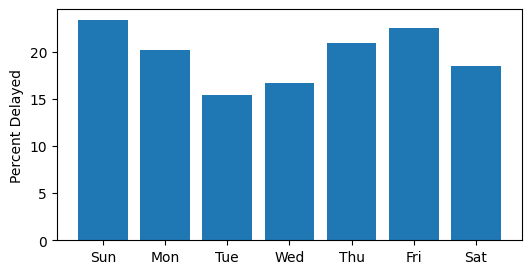

In [13]:
plt.figure(figsize=(6, 3))
plt.bar(percent_delayed.index, percent_delayed)
plt.ylabel('Percent Delayed')
plt.show()

The day of the week with the fewest late flights is Tuesday.

## Project extensions

Below is a proposed extension idea. 

The file `us-daily-passengers.csv` contains data on the daily number of passengers flying in the United States throughout 2023.

Create a graph that shows the average number of passengers flying per day of the week. Then, compare this graph to your graph of the percentage of flights delayed by day of week. What patterns do you see?

In [14]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'us-daily-passengers.csv'.

# from google.colab import files
# uploaded = files.upload()

In [15]:
passengers = pd.read_csv('us-daily-passengers.csv')
passengers.head()

,date,num_passengers
0,1/1/23,2046950
1,1/2/23,2368194
2,1/3/23,2212528
3,1/4/23,1985965
4,1/5/23,2031976


In [22]:
# YOUR CODE HERE (add new cells as needed)
# Create a graph that shows the average number of passengers flying per day of the week. 
# Then, compare this graph to your graph of the percentage of flights delayed by day of week. What patterns do you see?
passengers.dtypes
passengers['date'] = passengers['date'].astype('datetime64[s]')
passengers

,date,num_passengers
0,2023-01-01,2046950
1,2023-01-02,2368194
2,2023-01-03,2212528
3,2023-01-04,1985965
4,2023-01-05,2031976
...,...,...
360,2023-12-27,2663517
361,2023-12-28,2633264
362,2023-12-29,2636605
363,2023-12-30,2563962


In [23]:
passengers['day'] = passengers['date'].dt.strftime('%a')
passengers

,date,num_passengers,day
0,2023-01-01,2046950,Sun
1,2023-01-02,2368194,Mon
2,2023-01-03,2212528,Tue
3,2023-01-04,1985965,Wed
4,2023-01-05,2031976,Thu
...,...,...,...
360,2023-12-27,2663517,Wed
361,2023-12-28,2633264,Thu
362,2023-12-29,2636605,Fri
363,2023-12-30,2563962,Sat


In [43]:
passengers_day = passengers[['day', 'num_passengers']]
passengers_day


,day,num_passengers
0,Sun,2046950
1,Mon,2368194
2,Tue,2212528
3,Wed,1985965
4,Thu,2031976
...,...,...
360,Wed,2663517
361,Thu,2633264
362,Fri,2636605
363,Sat,2563962


In [57]:
# Calculate average passengers per day of week (remove the *100)
passengers_per_day = passengers_day.groupby('day')['num_passengers'].mean()
passengers_per_day

day
Fri    2.547110e+06
Mon    2.442001e+06
Sat    2.168205e+06
Sun    2.506567e+06
Thu    2.489463e+06
Tue    2.098239e+06
Wed    2.210753e+06
Name: num_passengers, dtype: float64

In [58]:
# Reorder by days of the week
new_index_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
passengers_per_day = passengers_per_day.reindex(new_index_order)
passengers_per_day

day
Sun    2.506567e+06
Mon    2.442001e+06
Tue    2.098239e+06
Wed    2.210753e+06
Thu    2.489463e+06
Fri    2.547110e+06
Sat    2.168205e+06
Name: num_passengers, dtype: float64

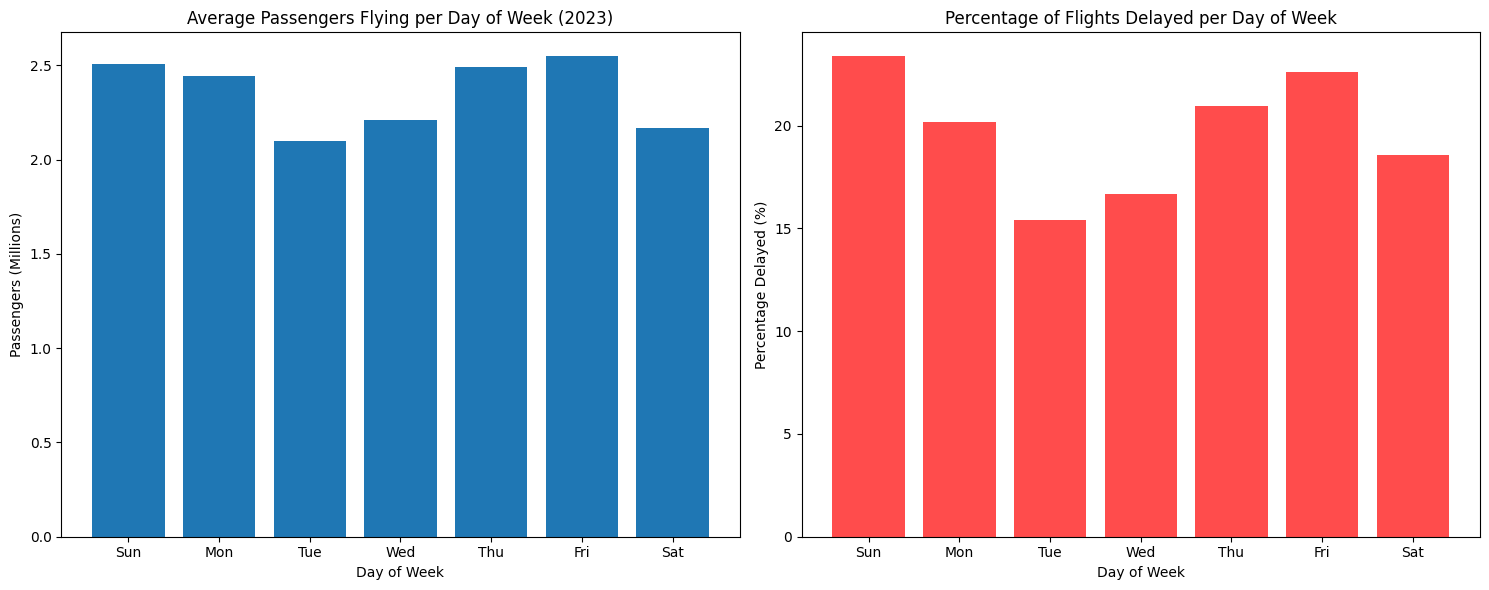

COMPARISON ANALYSIS:

Average Passengers per Day (in millions):
Sun: 2.51 million
Mon: 2.44 million
Tue: 2.10 million
Wed: 2.21 million
Thu: 2.49 million
Fri: 2.55 million
Sat: 2.17 million

Percentage of Flights Delayed:
Sun: 23.38%
Mon: 20.19%
Tue: 15.42%
Wed: 16.69%
Thu: 20.94%
Fri: 22.59%
Sat: 18.56%


In [61]:
# Recreate the delay percentages (they got overwritten)
delay_percentages = departures.groupby('day_name')['is_late'].mean() * 100
delay_percentages = delay_percentages.reindex(new_index_order)

# Create side-by-side comparison charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Average passengers per day
ax1.bar(passengers_per_day.index, passengers_per_day / 1000000)  # Convert to millions for readability
ax1.set_title('Average Passengers Flying per Day of Week (2023)')
ax1.set_ylabel('Passengers (Millions)')
ax1.set_xlabel('Day of Week')

# Chart 2: Percentage of flights delayed per day
ax2.bar(delay_percentages.index, delay_percentages, color='red', alpha=0.7)
ax2.set_title('Percentage of Flights Delayed per Day of Week')
ax2.set_ylabel('Percentage Delayed (%)')
ax2.set_xlabel('Day of Week')

plt.tight_layout()
plt.show()

# Print the actual values for comparison
print("COMPARISON ANALYSIS:")
print("\nAverage Passengers per Day (in millions):")
for day in new_index_order:
    print(f"{day}: {passengers_per_day[day]/1000000:.2f} million")

print("\nPercentage of Flights Delayed:")
for day in new_index_order:
    print(f"{day}: {delay_percentages[day]:.2f}%")

## Pattern Analysis: Passenger Volume vs Flight Delays

Based on the comparison between passenger volume and flight delays by day of week, several interesting patterns emerge:

### Key Observations:

1. **Inverse Relationship on Weekdays**: 
   - **Tuesday and Wednesday** have the lowest passenger volumes but also the lowest delay rates
   - This suggests that lower traffic leads to fewer delays

2. **Weekend Patterns**:
   - **Sunday** has high passenger volume and the highest delay rate (worst day for delays)
   - **Saturday** has moderate passenger volume but relatively low delays

3. **Monday Phenomenon**:
   - **Monday** has high passenger traffic but moderate delay rates
   - This might be due to fresh start of the week with better operational efficiency

4. **Friday Performance**:
   - **Friday** has the highest passenger volume but delays are in the middle range
   - Airlines might be better prepared for high Friday travel volume

### Business Insights:

- **Best Travel Days**: Tuesday and Wednesday offer both lower crowds and fewer delays
- **Worst Travel Day**: Sunday combines high traffic with highest delay probability
- **Airlines seem to manage high-volume days differently** - Friday performs better than Sunday despite similar traffic levels
- **Operational efficiency** appears to be better maintained on weekdays compared to weekends